<a href="https://colab.research.google.com/github/kavya-prabahar/CODSOFT/blob/main/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing of Neccessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from google.colab import drive
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from pandas import DataFrame

In [ ]:

import requests
from io import StringIO

# URL of the dataset on GitHub
url = "https://raw.githubusercontent.com/kavya-prabahar/CODSOFT/main/Titanic%20Dataset.csv"

response = requests.get(url)
if response.status_code == 200:
    data = StringIO(response.text)
    dataset = pd.read_csv(data)
else:
    print("Failed to download the dataset")



In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Understanding the distribution of Data through Skew:**

---



In [ ]:
dataset.skew()

<ipython-input-12-8035be43cde7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

## *** The count plot shows there exists a class imbalance. ***

<ipython-input-13-3338afca818f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

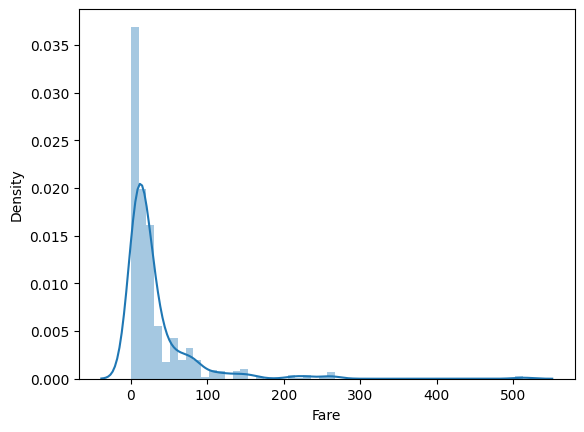

In [ ]:
sns.distplot(dataset["Fare"])

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

dataset['Fare_log'] = np.log(dataset['Fare'] + 1)


<ipython-input-15-0c085effab1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Fare_log'])


<Axes: xlabel='Fare_log', ylabel='Density'>

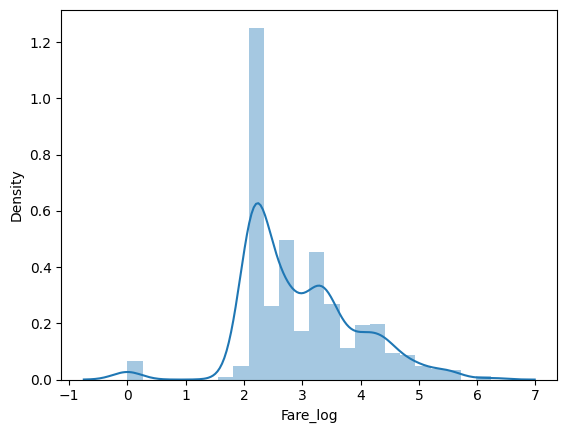

In [ ]:
sns.distplot(dataset['Fare_log'])

In [ ]:
dataset = dataset.drop(columns = ['Fare'])


<ipython-input-17-fcf205519be6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Pclass"])


<Axes: xlabel='Pclass', ylabel='Density'>

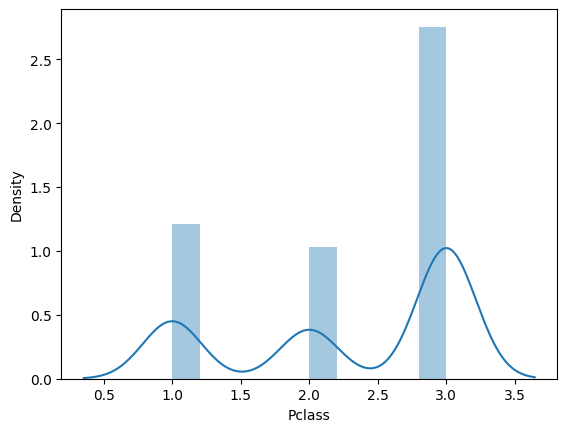

In [ ]:
sns.distplot(dataset["Pclass"])

<ipython-input-18-388b185de253>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


<Axes: xlabel='Age', ylabel='Density'>

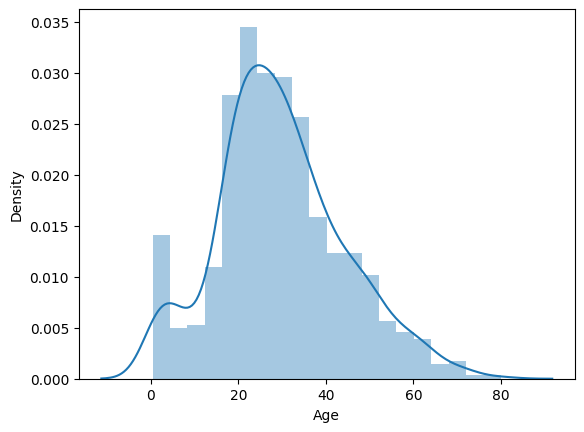

In [ ]:
sns.distplot(dataset["Age"])

<ipython-input-19-311cf934f60a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Parch"])


<Axes: xlabel='Parch', ylabel='Density'>

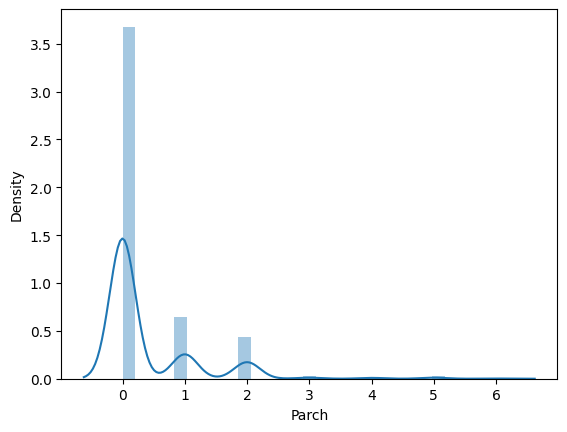

In [ ]:
sns.distplot(dataset["Parch"])

<ipython-input-20-74caab595486>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["SibSp"])


<Axes: xlabel='SibSp', ylabel='Density'>

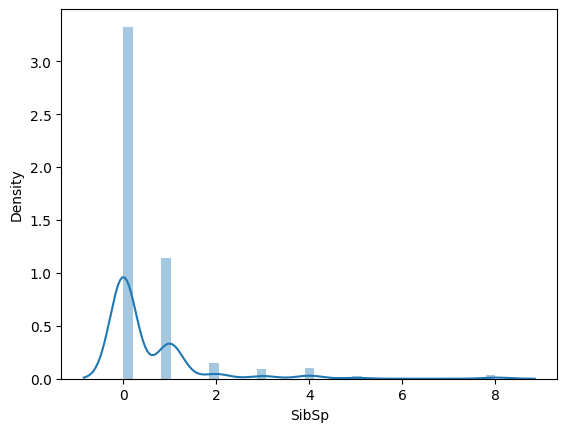

In [ ]:
sns.distplot(dataset["SibSp"])

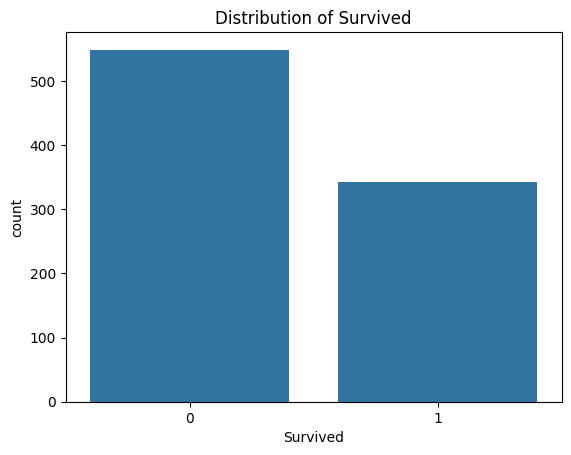

In [ ]:

sns.countplot(x='Survived', data=dataset)
plt.title('Distribution of Survived')
plt.show()

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Cabin          687
Embarked         2
Fare_log         0
dtype: int64

In [ ]:
dataset.select_dtypes(include=(['int64','float64'])).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare_log         0
dtype: int64

In [ ]:
print("After handling missing values")
dataset.select_dtypes(include=(['int64','float64'])).isna().sum()
df_num_col = dataset.select_dtypes(include=(['int64','float64'])).columns
for c in df_num_col:
  dataset[c].fillna(dataset[c].mean(),inplace=True)
dataset.select_dtypes(include=(['int64','float64'])).isna().sum()


After handling missing values


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare_log       0
dtype: int64

In [ ]:
dataset.select_dtypes(include=(['object'])).isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
dataset = dataset.drop(columns=['Cabin'])

In [ ]:
import pandas as pd

categorical_variable = 'Sex'

class_counts = dataset[categorical_variable].value_counts()

print("Class counts for", categorical_variable)
print(class_counts)


Class counts for Sex
male      577
female    314
Name: Sex, dtype: int64


In [ ]:
import pandas as pd

categorical_variable = 'Embarked'

class_counts = dataset[categorical_variable].value_counts()

print("Class counts for", categorical_variable)
print(class_counts)


Class counts for Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
dataset["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
dataset["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
dataset = dataset.drop(columns=['Name'])

In [ ]:
dataset = dataset.drop(columns=['Ticket'])

In [ ]:
print("After handling missing values")
dataset.select_dtypes(include=(['object'])).isna().sum()
df_num_col = dataset.select_dtypes(include=(['object'])).columns
for c in df_num_col:
  dataset[c].fillna(dataset[c].mode().values[0],inplace=True)
dataset.select_dtypes(include=(['object'])).isna().sum()


After handling missing values


Sex         0
Embarked    0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

dataset = pd.get_dummies(dataset, columns=["Sex","Embarked"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare_log',
        'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = dataset[cols]
Y = dataset['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.75)


In [ ]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare_log,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,2.110213,0,1,0,0,1
1,2,1,38.000000,1,0,4.280593,1,0,1,0,0
2,3,3,26.000000,0,0,2.188856,1,0,0,0,1
3,4,1,35.000000,1,0,3.990834,1,0,0,0,1
4,5,3,35.000000,0,0,2.202765,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,2.639057,0,1,0,0,1
887,888,1,19.000000,0,0,3.433987,1,0,0,0,1
888,889,3,29.699118,1,2,3.196630,1,0,0,0,1
889,890,1,26.000000,0,0,3.433987,0,1,1,0,0


In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

ac = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {ac}")

precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

recall = recall_score(Y_test, Y_pred)
print(f"Recall: {recall}")

f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score: {f1}")


Confusion Matrix:
[[129  10]
 [ 25  59]]
Accuracy: 0.8430493273542601
Precision: 0.855072463768116
Recall: 0.7023809523809523
F1 Score: 0.7712418300653594


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8248120300751879


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=1 , max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=50)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

ac = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {ac}")

precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

recall = recall_score(Y_test, Y_pred)
print(f"Recall: {recall}")

f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score: {f1}")


In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, classes=["Not Survived", "Survived"], line_color='purple')

visualizer.fit(X_train, Y_train)

visualizer.score(X_test, Y_test)

visualizer.show()
